In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hazm import *
from nltk.tokenize import word_tokenize
import re

In [2]:
# read data
df = pd.read_csv("Task/Topic Modeling/twitter_corona981_full/exportData/corona981/twitter_corona981_full.csv")
df.head()

,Unnamed: 0,favorite_count,hashtagField,location,mentionField,ownerId,ownerName,postId,reply_count,retweet_count,retweeted_ownerId,retweeted_postId,tagField,textField,textField_normal,time_jalali,timestamp
0,0,"""0""","""ویروس_کرونا""","""جمهوری اسلامی ایران""","""""",1140945568505708544,"""Safire_Mehr""",1221133198379192321,"""0""","""0""","""0""","""0""","""""","""کرونا داشتیم وقتی کرونا مد نبود #ویروس_کرونا""","""کرونا داشتیم وقتی کرونا مد نبود ویروس کرونا""",1398-11-05 21:40:16,1579975816
1,1,"""0""","""ویروس_کرونا;کرونا""","""""","""""",1221925473900429313,"""Jonny_walker666""",1223016973975674881,"""0""","""0""","""0""","""0""","""""","""گفتم کرونا ناراحت نشه یه موقع #کرونا #ویروس_ک...","""گفتم کرونا ناراحت نشه یه موقع کرونا ویروس کرونا""",1398-11-11 02:25:43,1580424943
2,2,"""3""","""ویروس_کرونا""","""""","""""",1214838745918259200,"""rzRz471""",1220858435044093952,"""0""","""1""","""0""","""0""","""ویروس کرونا""","""ویروس کرونا داشتیم وقتی کرونا مد نبود #ویروس_...","""ویروس کرونا داشتیم وقتی کرونا مد نبود ویروس ک...",1398-11-05 03:28:28,1579910308
3,3,"""0""","""""","""""","""""",866686549722845184,"""laleh_wazhegoon""",1220980152122953729,"""0""","""0""","""0""","""0""","""""","""اینجا کرونا آنجا کرونا همه جا کرونا این کرونا...","""اینجا کرونا انجا کرونا همه جا کرونا این کرونا...",1398-11-05 11:32:07,1579939327
4,4,"""0""","""""","""""","""seyedmohammadww""",1182218416012312576,"""VTPmKSO7wFxM8gZ""",1220760647232901120,"""0""","""0""","""1110607722624573441""","""1220669177826041856""","""ویروس کرونا""","""RT @seyedmohammadww: اسلام از ویروس کرونا کشن...","""rt seyedmohammadww اسلام از ویروس کرونا کشنده...",1398-11-04 20:59:53,1579886993


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67022 entries, 0 to 67021
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         67022 non-null  int64 
 1   favorite_count     67022 non-null  object
 2   hashtagField       67022 non-null  object
 3   location           67022 non-null  object
 4   mentionField       67022 non-null  object
 5   ownerId            67022 non-null  int64 
 6   ownerName          67022 non-null  object
 7   postId             67022 non-null  int64 
 8   reply_count        67022 non-null  object
 9   retweet_count      67022 non-null  object
 10  retweeted_ownerId  67022 non-null  object
 11  retweeted_postId   67022 non-null  object
 12  tagField           67022 non-null  object
 13  textField          67022 non-null  object
 14  textField_normal   67022 non-null  object
 15  time_jalali        67022 non-null  object
 16  timestamp          67022 non-null  int64

In [140]:
tweets = df['textField_normal']
# drop duplicate texts
tweets = tweets.drop_duplicates().reset_index(drop=True)
# tokenize tweets
tweets = tweets.apply(lambda x: word_tokenize(x))

In [141]:
# remove english words from persian tweets
def remove_english(tw):
    words = [w for w in tw if not re.match(r'[a-zA-Z0-9]+', w)]
    return words
tweets = tweets.apply(lambda x: remove_english(x))  

In [142]:
stopwords = utils.stopwords_list()
stopwords.extend(["''", "``", "ی", "ا", "ها", "های", "یه", "دیگه", "اگه", "ای", "تو", "ان", "اون", "ج"])
# remove stopwords
def remove_stop(tw):
    words = [w for w in tw if w not in stopwords]
    return words
tweets = tweets.apply(lambda x: remove_stop(x))

In [143]:
# lemmatize words
lemmatizer = Lemmatizer()
def lemmatize_words(tw):
    words = [lemmatizer.lemmatize(w) for w in tw]
    return words
tweets = tweets.apply(lambda x: lemmatize_words(x))

In [144]:
# create inputs to LDA topic model
import gensim.corpora as corpora
# create dictionary
id2word = corpora.Dictionary(tweets)
# create corpus
texts = tweets
# term document frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [145]:
import gensim
# build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=10, random_state=42)

In [146]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.043*"کرونا" + 0.033*"چین" + 0.033*"ویروس" + 0.023*"بیمارستان" + '
  '0.019*"پرواز" + 0.015*"ساخت" + 0.013*"ایران" + 0.013*"دارو" + 0.012*"بیمار" '
  '+ 0.012*"هوا"'),
 (1,
  '0.048*"کرونا" + 0.045*"ویروس" + 0.019*"سال" + 0.019*"اسلام" + '
  '0.017*"جمهوری" + 0.011*"چین" + 0.011*"دولت" + 0.009*"بود#باش" + '
  '0.008*"هزار" + 0.008*"تو"'),
 (2,
  '0.046*"کرونا" + 0.041*"ویروس" + 0.022*"ایران" + 0.017*"امام" + 0.017*"میشه" '
  '+ 0.015*"داره" + 0.014*"فرستاده" + 0.013*"امریکا" + 0.011*"هواپیما" + '
  '0.011*"ماه"'),
 (3,
  '0.036*"کرونا" + 0.024*"اسلام" + 0.020*"خاطر" + 0.019*"طب" + 0.018*"مرگ" + '
  '0.017*"باشه" + 0.016*"تو" + 0.014*"ویروس" + 0.014*"کرد#کن" + '
  '0.013*"گفت#گو"'),
 (4,
  '0.055*"ویروس" + 0.049*"کرونا" + 0.041*"ایران" + 0.031*"بهداشت" + '
  '0.024*"کشور" + 0.021*"چینی" + 0.017*"ورود" + 0.016*"اعلام" + 0.016*"جهانی" '
  '+ 0.015*"بیمار"'),
 (5,
  '0.055*"مهدی" + 0.038*"کرونا" + 0.029*"میلیون" + 0.018*"میکنم" + 0.015*"دست" '
  '+ 0.015*"زمان" + 0.014*"سیل" + 0.0

In [147]:
from gensim.models.coherencemodel import CoherenceModel
# a measure of how good the model is. the lower the better.
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.394708155094008

Coherence Score:  0.36669732185974213


In [148]:
# Visualize the topics
import pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

c:\users\jami\appdata\local\programs\python\python39\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.065685  0.104631       1        1  20.157229
6      0.096372  0.158537       2        1  15.256229
4     -0.210523 -0.047377       3        1  13.784716
2     -0.027409  0.095701       4        1  11.745448
1     -0.031603  0.077590       5        1  10.064343
7     -0.217872 -0.202513       6        1   7.911597
0     -0.108219 -0.006904       7        1   7.299132
3      0.164698  0.114820       8        1   5.161565
5      0.113497 -0.042465       9        1   4.693208
8      0.286743 -0.252019      10        1   3.926535, topic_info=        Term         Freq         Total Category  logprob  loglift
125      چین  8224.000000   8224.000000  Default  30.0000  30.0000
124      نفر  3556.000000   3556.000000  Default  29.0000  29.0000
260   بهداشت  2150.000000   2150.000000  Default  28.0000  28.0000
754      شهر  1939.000000   1939.000000  Default  27.0000  27.0000
4134    مهدی  1282.000000   1282.000000  Default  26.0000  26.0000
...      ...          ...           ...      ...      ...      ...
276     دارن   288.040106    833.595143  Topic10  -4.2183   2.1748
3      کرونا   478.747396  23392.084778  Topic10  -3.7102  -0.6516
305        ک   154.501267    396.522446  Topic10  -4.8412   2.2949
145       سر   174.289476   1041.254059  Topic10  -4.7207   1.4499
336    میکنم   147.998837    655.369089  Topic10  -4.8842   1.7494

[632 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
8         1  0.245486    #هست
8         2  0.453332    #هست
8         4  0.158202    #هست
8         5  0.090012    #هست
8         8  0.037096    #هست
...     ...       ...     ...
575       1  0.067434     یاد
575       5  0.250069     یاد
575       7  0.682774     یاد
5194     10  0.995901  یادمون
578       3  0.994080     یزد

[1258 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 5, 3, 2, 8, 1, 4, 6, 9])

In [169]:
doc_lda = lda_model[corpus]
topic_count = []
for i, row_list in enumerate(doc_lda):
    # sort topics based on weights
    row = sorted(row_list, key=lambda x: (x[1]), reverse=True)
    # get the dominant topic
    topic_count.append(row[0][0])
# count number of tweets related to each topic
topic_count = {i:topic_count.count(i) for i in topic_count}

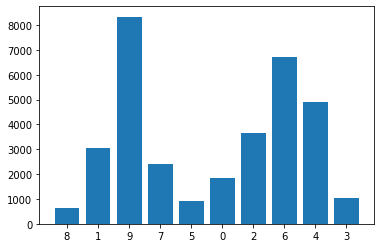

In [171]:
# plot number of tweets for each topic
plt.bar(range(len(topic_count)), list(topic_count.values()), align='center')
plt.xticks(range(len(topic_count)), list(topic_count.keys()))
plt.show()